<a href="https://colab.research.google.com/github/autinn/deep-tech-talent/blob/main/Lab05_H_2_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab05: Create a Basic Neural Network for Image Classification**

## 1. Import Library and Data

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title Code for loading the data
# import libraries
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

# utilities library
import cv2
import os

data_path = '/content/gdrive/My Drive/Colab Notebooks/data/jaffe/jaffe'
data_dir_list = os.listdir(data_path)

img_data_list=[]
img_label = []
label_map = {}
i = 0

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    label_map[i] = str(dataset)

    for img in img_list:
        img_label.append(i)
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
    i += 1

img_data = np.array(img_data_list)
img_data = img_data.astype('float')
img_data = img_data/255 #normalization
img_label = np.array(img_label)

def getlabel(id):
    return label_map[id]

**About this Data**:

We will use the Japanese Female Facial Expression (JAFFE) dataset which has 183 images of 10 different female models posing for 6 emotions. The data will be normalized so its value will ranging from 0 to 1.

The label will be denoted as numbers, which follow this mapping :

|    | Expression   |
|---:|:-------------|
|  0 | DISGUST          |
|  1 | SAD          |
|  2 | SURPRISE       |
|  3 |   ANGRY    |
|  4 |  HAPPY      |
|  5 |   FEAR    |

<details> <summary>Cite the author</summary>
Michael J. Lyons, Shigeru Akamatsu, Miyuki Kamachi, Jiro Gyoba. Coding Facial Expressions with Gabor Wavelets, 3rd IEEE International Conference on Automatic Face and Gesture Recognition, pp. 200-205 (1998). http://doi.org/10.1109/AFGR.1998.670949 Open access content available at: https://zenodo.org/record/3430156

</details>

In [ ]:
# show the dimension of data and the label
img_data.shape, img_label.shape

((183, 128, 128, 3), (183,))

To help you more understand about the data shape, here's an illustration of colored image represented as 3d array.

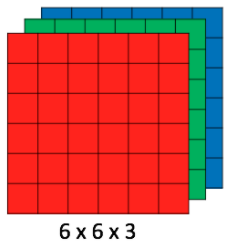

You can also visualize a few sample of the data to take a better understanding

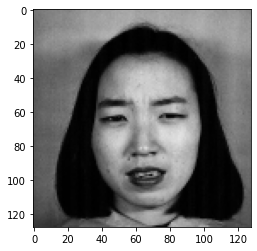

In [ ]:
i = 0
plt.imshow(img_data[i])

In [ ]:
print(f"label of the #{i} image is : {img_label[i]}")
print(f"which is translated into : {getlabel(img_label[i])}")

label of the #0 image is : 0
which is translated into : DISGUST


## Data Split (Train Test Split)

In previous notebook, we tested the model with a number that did not exist in the training data, and see if it can predict correctly. This process of comparing the model performance on training data vs the performance of unseen (test) data is called **Cross Validation**.

Because we cannot easily generate new image and test it into the model, we are going to take several image from train data and use it as test data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, img_label, test_size=0.1, random_state=0)

In [ ]:
print(f"The size of training sample : {x_train.shape}")
print(f"The size of test sample : {x_test.shape}")

The size of training sample : (164, 128, 128, 3)
The size of test sample : (19, 128, 128, 3)


___

## 2. Create the Model

In previous notebook, we already created a similar model using keras. Here's the code if you wanted to remember.

In [ ]:
# simple model in previous notebook
model_simple = keras.Sequential()

model_simple.add(keras.layers.Dense(units=1, input_shape=[1]))

model_simple.compile(optimizer='SGD', loss='mean_squared_error')

Now, we are going to create more complex neural network that can receive image as an input. You might notice the differences on :
- Flatten Layer
- Activation
- Optimizer, loss, metrics

In [ ]:
# create a neural network
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(128,128,3)) ) # flatten layer, transform 128x128x3 data into 49152*1

model.add(keras.layers.Dense(units = 128, activation='relu') )  #input layer
model.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer
model.add(keras.layers.Dense(units = 6, activation='softmax') ) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 3. Train the Model

In [ ]:
model.fit(x_train, y_train, epochs=40)

Epoch 1/40
6/6 [==============================] - 3s 9ms/step - loss: 15.2280 - accuracy: 0.1951
Epoch 2/40
6/6 [==============================] - 0s 8ms/step - loss: 5.4898 - accuracy: 0.1524
Epoch 3/40
6/6 [==============================] - 0s 9ms/step - loss: 3.0025 - accuracy: 0.2622
Epoch 4/40
6/6 [==============================] - 0s 8ms/step - loss: 2.2215 - accuracy: 0.2073
Epoch 5/40
6/6 [==============================] - 0s 9ms/step - loss: 2.0750 - accuracy: 0.2561
Epoch 6/40
6/6 [==============================] - 0s 8ms/step - loss: 1.7382 - accuracy: 0.3537
Epoch 7/40
6/6 [==============================] - 0s 8ms/step - loss: 1.7265 - accuracy: 0.3049
Epoch 8/40
6/6 [==============================] - 0s 8ms/step - loss: 1.5507 - accuracy: 0.4268
Epoch 9/40
6/6 [==============================] - 0s 8ms/step - loss: 1.8977 - accuracy: 0.3780
Epoch 10/40
6/6 [==============================] - 0s 9ms/step - loss: 1.8723 - accuracy: 0.3537
Epoch 11/40
6/6 [=====================

## 4. Test the Model

### Take sample test data

original label for the data is : 3


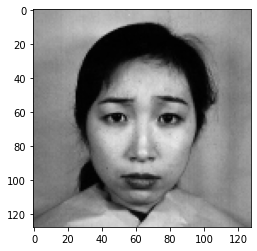

In [ ]:
# select i-th image as sample
i = 0
sample_image = x_test[i:i+1]

# you can  print the original label for the image
print(f"original label for the data is : {y_test[i]}")

# or plot the image to validate
plt.imshow(sample_image[0]);

In [ ]:
# if you are unsure of the label, use this function to see what the label belongs to
getlabel(3)


'SAD'

### Get the prediction from the model

In [ ]:
# predict sample image
model.predict(sample_image)

array([[0.10231879, 0.08273848, 0.0909686 , 0.12889878, 0.21399492,
        0.38108042]], dtype=float32)

In [ ]:
# use np argmax to get the highest number (most activated) of output layer
np.argmax(model.predict(sample_image))

5

### Evaluate model through all test data

we can also evaluate the whole test data to see what's the accuracy of this model on test data compared to train data



In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 130ms/step - loss: 1.0678 - accuracy: 0.5263


[1.0678073167800903, 0.5263158082962036]

And there you have it, a neural network to classify 6 types of expression of greyscale image. But as you can see, the classificaiton performance is not good. Dont worry, we will discuss what we can do in the next Lab excerise.